# Udacity Project 4: Wrangle and Analyze Data

**For this project, I am wrangling data from the WeRateDogs (@rate_dogs) twitter account. I have gathered the data from three different sources, and now I will assess and clean it before analyzing.**

## Table of Contents
<ul>
<li><a href="#Part1">Part 1: Assessing Data</a></li>
<li><a href="#Part2">Part 2: Cleaning Data</a></li>
<li><a href="#Part3">Part 3: Data Analysis</a></li>
</ul>

<br>

<a id='Part1'></a>
## Part 1: Assessing Data
<br>
<br>

### Dataset #1 -Twitter archive data

<br>

**I first load all python packages and libraries that I need. Then, I proceed to read in the first dataset (a Udacity provided CSV file) before assessing it for quality/tidiness issues.**

In [1]:
#Importing all needed python libraries and packages
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb
import requests
import os
import tweepy as tw
import json as js
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Reading in the udacity provided twitter archive data 
#and assigning it to the dog_archive dataset 
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')

#Creating a new copy of the dataset to work with
dog_archive_clean = dog_archive.copy()

In [3]:
#Displaying a sample of the dog_archive dataset
dog_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1331,705591895322394625,NaN,NaN,2016-03-04 03:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705591895...,11,10,None,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None


In [4]:
#Retrieving basic information about the columns 
#and rows of the dog_archive dataset
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#Retrieving statistics about the dog_archive dataset
dog_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Data Assessment for dog_archive_clean

<br>

**Quality Issues:**
1. Several columns are missing data:
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls


2. Column "Source" values can be shortened/extracted from URLs


3. Columns with incorrect data type:
    - column "timestamp" should have datetime data type
    - column "tweet_id" should have object (string) data type


4. Removal of invalid names (i.e a, an, the, etc.) from "name" column

<br>

**Tidiness Issues:**

1. Columns that need to be merged: 
    - "doggo" column
    - "floofer" column
    - "pupper" column
    - "puppo" column

<br>

### Dataset #2 - Image data

<br>

**I have completed my assessment of the first dataset and will now assess the next using the same steps.**

In [6]:
#Reading in the udacity provided image data from an external URL
#and storing it within a .tsv file called image-predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join("image-predictions.tsv"), 'wb') as f:
    f.write(response.content)

In [7]:
#Assigning it to the dog_images dataset
dog_images = pd.read_csv("image-predictions.tsv", delimiter="\t")

In [8]:
#Creating a new copy of the dataset to work with
dog_images_clean = dog_images.copy()

In [9]:
#Displaying a sample of the dog_images dataset
dog_images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True


In [10]:
#Retrieving basic information about the columns 
#and rows of the dog_images dataset
dog_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#Retrieving statistics about the dog_images dataset
dog_images_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Data Assessment for dog_images_clean

<br>

**Quality Issues:**
1. Columns "p1", "p2", and "p3" have a non-uniform naming convention (mixing uppercase/lowercase wording)


2. Column tweet_id should have object (string) data type

<br>

**Tidiness Issues:**

1. Dataset contains information about tweets that should be added to the dog_archive_clean dataset.

<br>

### Dataset #3 - Twitter API data


**Unfortunately I was not able to get approval for my
Twitter developer account in time, and as such was 
unable to use Tweepy for this part of the project. I have displayed below the code that would have been used to import the data by this method. This code has been made part of a comment block and will NOT execute.**

In [12]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

<br>

**Below is the method that I actually used to import this data.**

<br>

In [13]:
#Reading in the data gathered from the twitter API for
#tweet id, retweet counts and like counts.

#First I create the df_twitter dataframe to hold the data
df_twitter=pd.DataFrame(columns=['tweet_id','retweets','likes'])

#Then create a "for" loop to extract the tweet id, 
#retweet counts and like counts for each json record,
#before appednignthem to the df_twitter dataset.
with open('tweet-json.txt') as file:
  for line in file:
    status=js.loads(line)
    tweet_id=status['id_str']
    retweets=status['retweet_count']
    likes=status['favorite_count']
    df_twitter=df_twitter.append(pd.DataFrame([[tweet_id,retweets,likes]],columns=['tweet_id','retweets','likes']))

In [14]:
#Creating a new copy of the dataset to work with
df_twitter_clean = df_twitter.copy()

In [15]:
#Displaying a sample of the df_twitter dataset
df_twitter_clean.sample(5)

,tweet_id,retweets,likes
0,850145622816686080,4244,17519
0,670361874861563904,71,344
0,707693576495472641,1133,3765
0,706681918348251136,1103,3627
0,753398408988139520,2186,6384


In [16]:
#Retrieving basic information about the columns 
#and rows of the df_twitter dataset
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id    2354 non-null object
retweets    2354 non-null object
likes       2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [17]:
#Retrieving statistics about the df_twitter dataset
df_twitter_clean.describe()

,tweet_id,retweets,likes
count,2354,2354,2354
unique,2354,1724,2007
top,805823200554876929,3652,0
freq,1,5,179


### Data Assessment for df_twitter_clean

<br>

**Quality Issues:**

1. Columns "retweets" and "likes" should be converted from object data type to integer data type.
   

2. Column tweet_id should have object (string) data type

<br>

**Tidiness Issues:**

1. Dataset contains information about tweets that should be added to the dog_archive_clean dataset.

<br>

<a id='Part2'></a>
## Part 2: Cleaning Data
<br>
<br>

**I now begin to take action on the observations made during the  assessment stage. I will clean the datasets by using the following steps:**

1. **DEFINE** the actions that need to be taken
2. **CODE** a solution for these actions
3. **TEST** the code

### First, I will clean the <font color=red>dog_archive_clean</font> dataset. The assessment results were as follows:

**Quality Issues:**
1. Several columns are missing data:
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls


2. Column "Source" values can be shortened/extracted from URLs


3. Columns with incorrect data type:
    - column "timestamp" should have datetime data type
    - column tweet_id should have int64 data type


4. Removal of invalid names (i.e a, an, the, etc.) from "name" column

<br>

**Tidiness Issues:**

1. Columns that need to be merged: 
    - "doggo" column
    - "floofer" column
    - "pupper" column
    - "puppo" column

### <font color=red>DEFINE</font>

#### Here is where I will define the actions to be taken for this datatset. For each quality issue I will do the following:

1. Drop columns
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls


2. Use loc method to isolate and change cell values


3. Use pd.to_datetime() to correct the timestamp datatype, and use .astype(str) to correct the tweet_id datatype.


4. Use a mask and regex to isolate invalid names before removing them


#### and for the one tidiness issue:
1. Columns that need to be merged: 
    - "doggo" column
    - "floofer" column
    - "pupper" column
    - "puppo" column

### <font color=red>CODE</font>

**Below I create the code to execute the above actions.**

In [18]:
#Isolating and dropping the rows that correspond to retweets
dog_archive_clean = dog_archive_clean[dog_archive_clean['retweeted_status_id'].isnull()]
dog_archive_clean = dog_archive_clean[dog_archive_clean['retweeted_status_user_id'].isnull()]
dog_archive_clean = dog_archive_clean[dog_archive_clean['retweeted_status_timestamp'].isnull()]

#Dropping all unneeded columns
dog_archive_clean = dog_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

In [19]:
#Viewing the unique values in the "source column"
dog_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
#Using masks to isolate each of the four proper values from "source" column

#"Twitter for iPhone"
dog_archive_clean.loc[(dog_archive_clean['source']=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'), 'source'] = "Twitter for iPhone"

#"Vine"
dog_archive_clean.loc[(dog_archive_clean['source']=='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'), 'source'] = "Vine"

#"Twitter Webclient"
dog_archive_clean.loc[(dog_archive_clean['source']=='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'), 'source'] = "Twitter Web Client"

#"Tweetdeck"
dog_archive_clean.loc[(dog_archive_clean['source']=='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'), 'source'] = "TweetDeck"

In [21]:
#Changing the "timestamp" column to a datetime datatype
dog_archive_clean['timestamp'] = pd.to_datetime(dog_archive_clean['timestamp'], infer_datetime_format=True)

#Changing the "tweet_id" column to an object (string) datatype
dog_archive_clean['tweet_id'] = dog_archive_clean['tweet_id'].astype(str)

In [22]:
#Generating a list of invalid name in the dataset's name column
invalid_names = dog_archive_clean.name.str.contains('^[a-z]', regex = True)

#Sorting the values retunred above alphabetically
dog_archive_clean[invalid_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [23]:
#Removing all values returned by the code above from the dataset
dog_archive_clean = dog_archive_clean[~invalid_names]

### <font color=red>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [24]:
#Displaying the dataset and confirming that the above
#changes have taken effect.
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 194.2+ KB


In [25]:
#Showing the dataset content
dog_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [26]:
#Confirming the removal of improper dog names
dog_archive_clean['name'].value_counts()

None         680
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           8
Daisy          7
Toby           7
Koda           6
Bella          6
Bo             6
Jax            6
Stanley        6
Oscar          6
Bailey         6
Rusty          5
Leo            5
Buddy          5
Milo           5
Scout          5
Dave           5
Chester        5
Louis          5
Bentley        5
Gus            4
Gary           4
            ... 
Jazz           1
Strider        1
Dug            1
Lassie         1
Rascal         1
Ralphie        1
Rhino          1
Kathmandu      1
Meatball       1
Divine         1
Shawwn         1
Reagan         1
Marty          1
Jamesy         1
Crumpet        1
Canela         1
Iggy           1
Jackie         1
Charl          1
Deacon         1
Tino           1
Tommy          1
Bobbay         1
Fillup         1
Shikha         1
Blanket        1
Spanky         1
Mimosa        

### Now, I will follow the same process to address the tidiness issues of the dataset.

### <font color=red>DEFINE</font>

#### Here is where I will define the actions to be taken for the tidiness portion of cleaning this datatset. For the single tidiness issue in this dataset, I will do the following:

1. Columns that need to be merged: 
    - "doggo" column
    - "floofer" column
    - "pupper" column
    - "puppo" column

### <font color=red>CODE</font>

**Below I create the code to execute the above actions.**

In [27]:
#Merging the "doggo","floofer","pupper", and "puppo" columns

#Replacing any 'None' values in the columns with blank spaces
dog_archive_clean.doggo.replace('None', '', inplace=True)
dog_archive_clean.floofer.replace('None', '', inplace=True)
dog_archive_clean.pupper.replace('None', '', inplace=True)
dog_archive_clean.puppo.replace('None', '', inplace=True)

#Replacing any 'Nan' values in the columns with blank spaces
dog_archive_clean.doggo.replace(np.NaN, '', inplace=True)
dog_archive_clean.floofer.replace(np.NaN, '', inplace=True)
dog_archive_clean.pupper.replace(np.NaN, '', inplace=True)
dog_archive_clean.puppo.replace(np.NaN, '', inplace=True)

#Creating the "dog_type" column in and merging the values of the
#"doggo","floofer","pupper", and "puppo" columns into it
dog_archive_clean['dog_type'] = dog_archive_clean.doggo + dog_archive_clean.floofer + dog_archive_clean.pupper + dog_archive_clean.puppo
dog_archive_clean.loc[dog_archive_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo,pupper'
dog_archive_clean.loc[dog_archive_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo,puppo'
dog_archive_clean.loc[dog_archive_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo,floofer'

#Deleting the "doggo","floofer","pupper", and "puppo" columns
dog_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

### <font color=red>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [28]:
#Displaying the dataset column info to confirm the changes
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_type              2071 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 145.6+ KB


In [29]:
#Showing the dataset contents
dog_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


### Next, I will clean the <font color=blue>dog_images_clean</font> dataset. The assessment results were as follows:

<br>

**Quality Issues:**
1. Columns "p1", "p2", and "p3" have a non-uniform naming convention (mixing uppercase/lowercase wording)


2. Column tweet_id should have object (string) data type

<br>

**Tidiness Issues:**

1. Dataset contains information about tweets that should be added to the dog_archive_clean dataset.

### <font color=blue>DEFINE</font>

#### Here is where I will define the actions to be taken to improve the quality of this datatset. For each quality issue I will take the following actions:

1. Use str. lower() to make all strings in "p1", "p2" and "p3" columns lowercase.


2. Use .astype(str) to correct the tweet_id datatype.

### <font color=blue>CODE</font>

**Below I create the code to execute the above actions.**

In [30]:
#Setting all "p1" column values to lowercase
dog_images_clean['p1']=dog_images_clean['p1'].str.lower()

#Setting all "p2" column values to lowercase
dog_images_clean['p2']=dog_images_clean['p2'].str.lower()

#Setting all "p3" column values to lowercase
dog_images_clean['p3']=dog_images_clean['p3'].str.lower()

#Changing the "tweet_id" column to an object (string) datatype
dog_images_clean['tweet_id'] = dog_images_clean['tweet_id'].astype(str)

### <font color=blue>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [31]:
#Displaying a sample of the dog_images_clean dataset
dog_images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,german_short-haired_pointer,0.935771,True,kelpie,0.022561,True,labrador_retriever,0.008847,True
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,border_collie,0.581835,True,collie,0.344588,True,shetland_sheepdog,0.043584,True
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,brabancon_griffon,0.003061,True


In [32]:
#Showing dataframe structure info
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_type              2071 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 145.6+ KB


### Again, I will follow the same process to address the tidiness issue of this dataset.

### <font color=blue>DEFINE</font>

#### For the one tidiness issue found withint this dataset, I will take the following action:

1. Join the <font color=blue>dog_images_clean</font> dataset with the <font color=red> dog_archive_clean </font>dataset using the tweet_id as the index.

### <font color=blue>CODE</font>

**Below I create the code to execute the above actions.**

In [33]:
#Joining the two datasets using the "tweet_id" column in both as the index for the join
dog_archive_clean=dog_archive_clean.join(dog_images_clean.set_index('tweet_id'), on='tweet_id')

### <font color=blue>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [34]:
#Displaying a sample record from the dog_archive_clean
#dataset to confirm that the join was successful
dog_archive_clean.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1072,739979191639244800,2016-06-07 00:36:02,Twitter for iPhone,This is Nollie. She's waving at you. If you do...,12,10,Nollie,,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1.0,irish_water_spaniel,0.2858,True,wig,0.240653,False,toy_poodle,0.074914,True


### Next, I will clean the <font color=green>df_twitter_clean</font> dataset. The assessment results were as follows:

<br>

**Quality Issues:**

1. Columns "retweets" and "likes" should be converted from object data type to integer data type.
   

2. Column tweet_id should have object (string) data type

<br>

**Tidiness Issues:**

1. Dataset contains information about tweets that should be added to the dog_archive_clean dataset. 

### <font color=green>DEFINE</font>

#### For the quality issues found within this dataset, I will take the following actions:

1. Use int() to correct the datatypes of the retweets and likes columns


2. Use .astype(str) to correct the tweet_id datatype.

### <font color=green>CODE</font>

**Below I create the code to execute the above actions.**

In [35]:
#Converting the "retweets" and "likes" columns to integer
#datatypes
df_twitter_clean['retweets'] = pd.to_numeric(df_twitter_clean['retweets'])
df_twitter_clean['likes'] = pd.to_numeric(df_twitter_clean['likes'])

#Changing the "tweet_id" column to an object (string) datatype
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(str)

### <font color=green>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [36]:
#Showing dataframe structure info
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id    2354 non-null object
retweets    2354 non-null int64
likes       2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


### <font color=green>DEFINE</font>

#### For the one tidiness issue found within this dataset, I will take the following action:

1. Join the <font color=green> df_twitter_clean </font> dataset with the <font color=red> dog_archive_clean </font> dataset using the tweet_id as the index.

### <font color=green>CODE</font>

**Below I create the code to execute the above actions.**

In [37]:
#Joining the two datasets using the "tweet_id" column in both as the index for the join
dog_archive_clean=dog_archive_clean.join(df_twitter_clean.set_index('tweet_id'), on='tweet_id')

### <font color=green>TEST</font>

**Here I display the dataset to test the application of the above changes.**

In [38]:
#Displaying the edited dog_archive_clean dataset to
#confirm the addition of the "retweets" and "likes" columns
#from df_twitter_clean
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_type              2071 non-null object
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweets              2071 non-null int64
likes                 20

In [39]:
#Showing a sample of the dataframe contents
dog_archive_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,likes
2042,671538301157904385,2015-12-01 03:56:22,Twitter for iPhone,This is Baxter. He's very calm. Hasn't eaten i...,8,10,Baxter,,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1.0,...,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False,436,993
642,793210959003287553,2016-10-31 22:00:04,Twitter for iPhone,This is Maude. She's the h*ckin happiest wasp ...,10,10,Maude,,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1.0,...,0.874431,False,french_bulldog,0.018759,True,boston_bull,0.015134,True,3301,9997
1725,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,9,10,Emmie,,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1.0,...,0.127701,False,shih-tzu,0.121811,True,bubble,0.117820,False,994,2818


**There are some missing values above in columns taken from the dog_images_clean and df_twitter_clean datasets, but those missing values will be left alone as they should not significantly impact analysis.**

**All three datasets were cleaned before being merged into one. Now I can begin analysis on the newly edited dog_archive_clean dataset.**

<br>

<a id='Part3'></a>
## Part 3: Data Analysis
<br>

**Now I will begin analysis by exploring the new merged dataset.**

In [40]:
#Displaying the number of rows and columns in the dataset
dog_archive_clean.shape

(2071, 21)

In [41]:
#Displaying dataset column info
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_type              2071 non-null object
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweets              2071 non-null int64
likes                 20

**As seen in the two cells above, my new dog_archive_clean dataframe has 2356 rows and 24 columns. Some of the columns do have null values, but as said in the previous section those missing values will be left alone as they should not significantly impact analysis. Datatypes include integer, float, object (string), and datetime. Statistics for applicable columns and the number of unique values in each are also displayed in the two cells below.**

In [42]:
#Displaying dataset column statistics
dog_archive_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweets,likes
count,2071.000000,2071.000000,1896.000000,1896.000000,1.896000e+03,1.896000e+03,2071.000000,2071.000000
mean,13.271366,10.424915,1.207278,0.594885,1.337713e-01,6.007494e-02,2787.284404,8878.522453
std,48.709300,6.216624,0.564350,0.273147,1.005117e-01,5.097523e-02,4682.168653,12090.934365
min,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,52.000000
25%,10.000000,10.000000,1.000000,0.360137,5.378615e-02,1.587760e-02,619.500000,2028.000000
50%,11.000000,10.000000,1.000000,0.588030,1.167160e-01,4.906315e-02,1367.000000,4149.000000
75%,12.000000,10.000000,1.000000,0.850559,1.940848e-01,9.198323e-02,3258.500000,11321.000000
max,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [43]:
#Displaying the number of unique values in each column
dog_archive_clean.nunique()

tweet_id              2071
timestamp             2071
source                   4
text                  2071
rating_numerator        38
rating_denominator      16
name                   931
dog_type                 8
jpg_url               1896
img_num                  4
p1                     362
p1_conf               1893
p1_dog                   2
p2                     388
p2_conf               1891
p2_dog                   2
p3                     395
p3_conf               1893
p3_dog                   2
retweets              1653
likes                 1925
dtype: int64

### Observations

**According to the cell above, the rating_numerator column has 38 unique values. Below I have used the value_counts() method to view the values as well as the number of times that they appear in the dataframe column.**

**Based on this, it appears that most ratings given by twitter users are always over 10 (the constant denominator). This seems to agree with the idea that ratings are not taken seriously by most users and are part of @WeRateDogs' lighthearted presentation. There are even some tongue-in-cheek ratings included (i.e 420, 666, 1776, etc.).**

In [44]:
#Displaying the unique rating numerator values and their counts
dog_archive_clean['rating_numerator'].value_counts(sort=True)

12      485
10      419
11      410
13      300
9       142
8        91
7        48
14       39
5        35
6        30
3        18
4        14
1         7
2         7
420       2
0         2
1776      1
960       1
121       1
99        1
75        1
45        1
27        1
17        1
15        1
20        1
24        1
26        1
44        1
50        1
80        1
84        1
88        1
144       1
182       1
143       1
666       1
165       1
Name: rating_numerator, dtype: int64

**Next I use the corr() method to examine the correlation between numerical and boolean variables. This method generates a correlation matrix that can be used to visually identify existing statistical relationships between values.**

In [45]:
#Displaying the matrix of correlations between columns
dog_archive_clean.corr()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweets,likes
rating_numerator,1.000000,0.122780,-0.000668,-0.008605,-0.019472,-0.002983,0.000635,-0.002734
rating_denominator,0.122780,1.000000,0.000270,-0.001117,-0.033878,0.011983,-0.020429,-0.027518
img_num,-0.000668,0.000270,1.000000,0.212560,-0.157672,-0.143512,0.104415,0.135922
p1_conf,-0.008605,-0.001117,0.212560,1.000000,-0.511323,-0.710881,0.064821,0.093241
p2_conf,-0.019472,-0.033878,-0.157672,-0.511323,1.000000,0.477365,-0.022791,-0.026210
p3_conf,-0.002983,0.011983,-0.143512,-0.710881,0.477365,1.000000,-0.049119,-0.058499
retweets,0.000635,-0.020429,0.104415,0.064821,-0.022791,-0.049119,1.000000,0.910237
likes,-0.002734,-0.027518,0.135922,0.093241,-0.026210,-0.058499,0.910237,1.000000


**For even easier visual inspection, a heatmap of the above matrix can also be generated, which I have done below.**

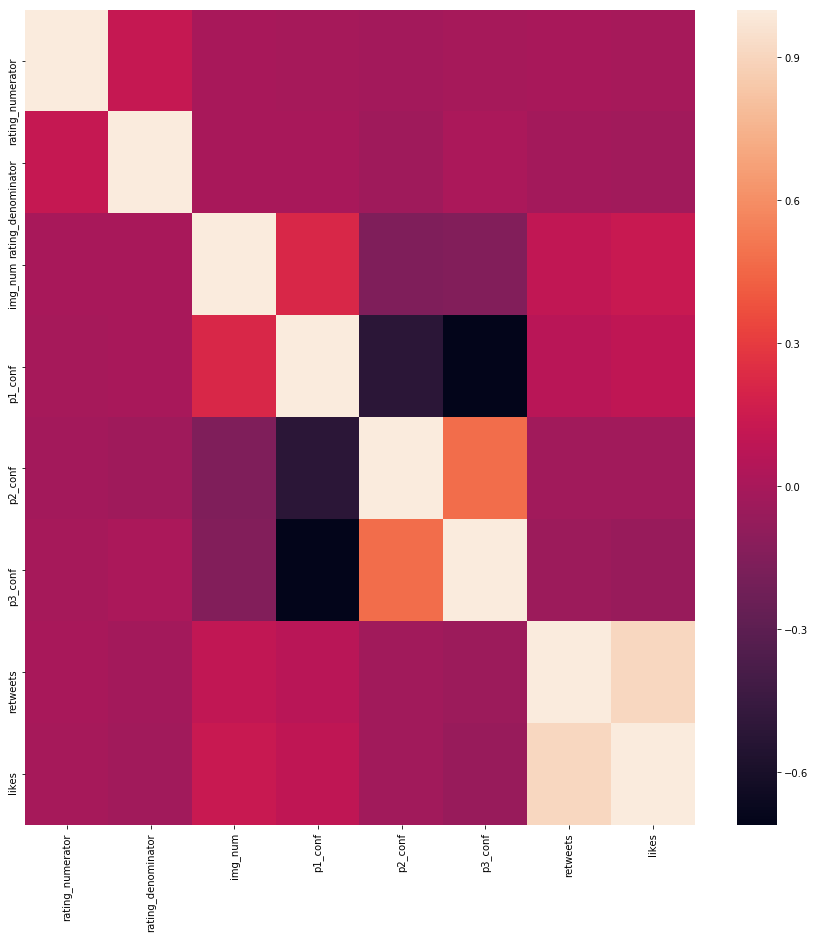

In [46]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(15, 15))
corr = dog_archive_clean.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**The matrix and heatmap don't seem to indicate many meaningful correlations, (positive [0.5 to 1.0] or negative [-0.5 to -1.0]) between most of the variables. The one correlation that stands out is the one between retweets and likes. I would reason that a tweet that is liked is also more likely to be retweeted, so the positive correlation here makes sense.**


**There are of course absolute positive correlations when the variables are compared to themselves, and some of the image prediction probabilities (p1, p2 and p3) seem to have significant correlations with each other, but these are almost certainly coincidence.**

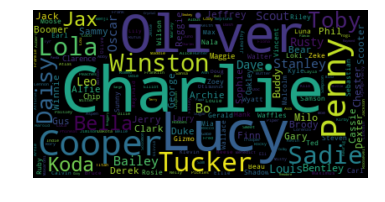

In [47]:
#Defining the parameters of wordcloud object
cloud = WordCloud(background_color="black")

#Defining the words to be used in the wordcloud
#making sure to not include null values
dog_cloud = cloud.generate(dog_archive_clean.loc[dog_archive_clean['name'] != 'None', 'name'].str.cat(others=None, sep=' '))

#Displaying the wordcloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Lastly, I wanted to see a visual representation of the most popular dog names among the pets submitted. I used the above cell to generate a word cloud of names in the dataframe. The bigger the name appears in the cloud, the more it appeared in the dataframe. For reference, I have included the names below along with their value counts. Note that the word cloud was configured to not include "None" values.**

In [48]:
dog_archive_clean['name'].value_counts()

None         680
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           8
Daisy          7
Toby           7
Koda           6
Bella          6
Bo             6
Jax            6
Stanley        6
Oscar          6
Bailey         6
Rusty          5
Leo            5
Buddy          5
Milo           5
Scout          5
Dave           5
Chester        5
Louis          5
Bentley        5
Gus            4
Gary           4
            ... 
Jazz           1
Strider        1
Dug            1
Lassie         1
Rascal         1
Ralphie        1
Rhino          1
Kathmandu      1
Meatball       1
Divine         1
Shawwn         1
Reagan         1
Marty          1
Jamesy         1
Crumpet        1
Canela         1
Iggy           1
Jackie         1
Charl          1
Deacon         1
Tino           1
Tommy          1
Bobbay         1
Fillup         1
Shikha         1
Blanket        1
Spanky         1
Mimosa        

In [51]:
dog_archive_clean.to_csv('twitter_archive_master.csv', index=False)